### About project

1. In the first section, the trees from sklearn are applied to the classification problem. Let’ see what separating surfaces trees are built for different datacets and analyze their dependence on different hyperparameters.
2. In the second section we implement our deciding tree and (to be continued): compare it with the standard sklearn implant.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# Decisive trees. Visualization.

**In this part, we will look at two simple two-dimensional datasets made with the help of 'make_moons', 'make_circles' and examine how the separating surface behaves depending on different hyperparameters.**

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

datasets_name = ["circles", "moons", "rand_class"]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

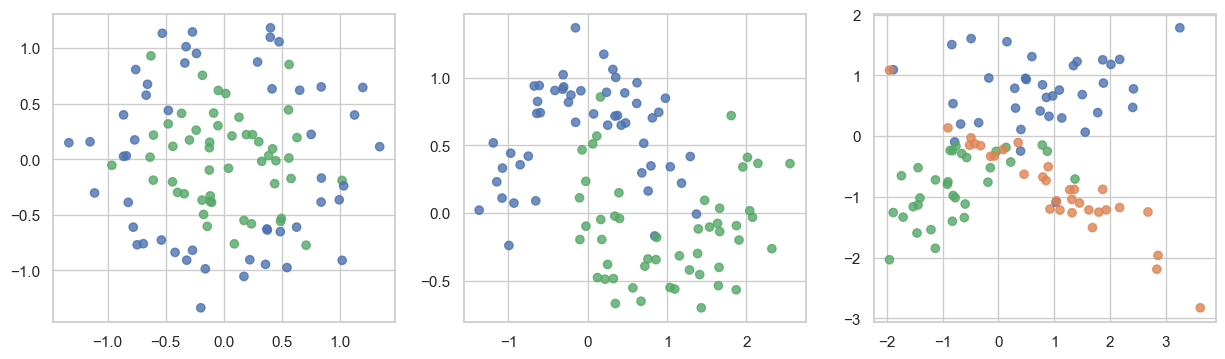

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

For each datacet, let’s train the deciding tree with the default parameters, predividing the sample into a learning and test. We construct dividing surfaces. We calculate accuracy on training and test samples.

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

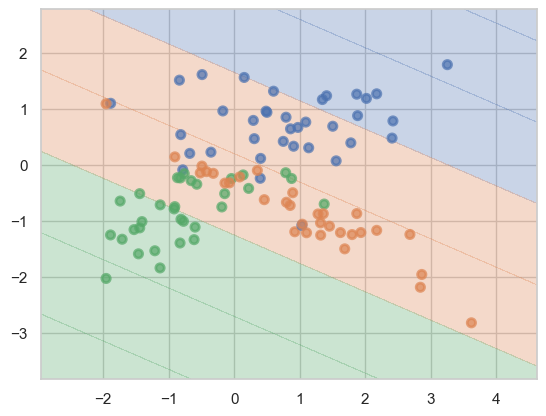

In [6]:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [8]:
def train_decis_tree(X, y, clf, plot_surf=True):
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
    
    clf.fit(X_train, y_train)

    predicted = clf.predict(X_test)
    predicted_train = clf.predict(X_train)
    score_test = accuracy_score(y_test, predicted)
    score_train = accuracy_score(y_train, predicted_train)
    
#     print("TEST: {:.4f}".format(score_test))
#     print("TRAIN: {:.4f}".format(score_train))
    
    if(plot_surf):
        plot_surface(clf, X, y)
        
    return score_train, score_test

In [9]:
clf = DecisionTreeClassifier(random_state=42)

TEST: 0.7333
TRAIN: 1.0000


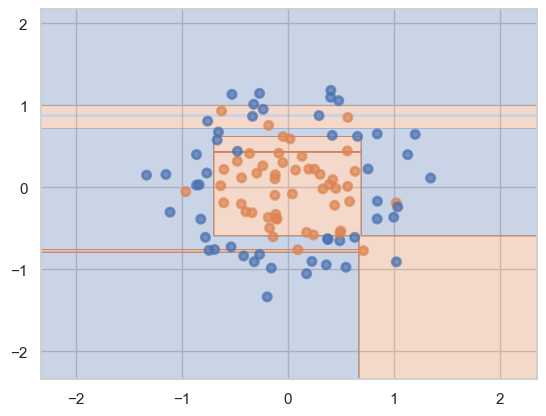

In [10]:
X, y = datasets[0]
score_train, score_test = train_decis_tree(X, y, clf)

print("TEST: {:.4f}".format(score_test))
print("TRAIN: {:.4f}".format(score_train))

TEST: 0.8667
TRAIN: 1.0000


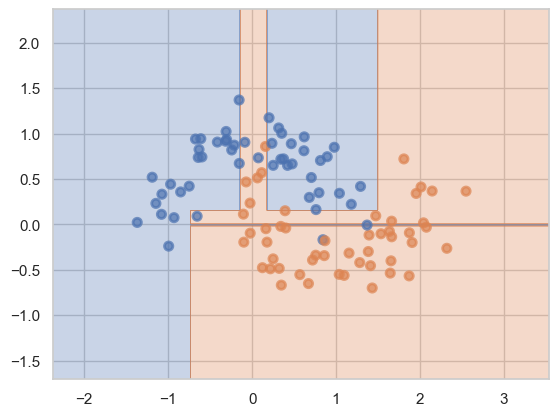

In [11]:
X, y = datasets[1]
score_train, score_test = train_decis_tree(X, y, clf)

print("TEST: {:.4f}".format(score_test))
print("TRAIN: {:.4f}".format(score_train))

TEST: 0.8333
TRAIN: 1.0000


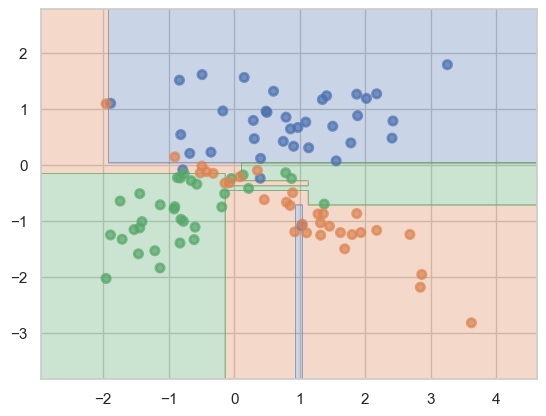

In [12]:
X, y = datasets[2]
score_train, score_test = train_decis_tree(X, y, clf)

print("TEST: {:.4f}".format(score_test))
print("TRAIN: {:.4f}".format(score_train))

#### Conclusion:
+ As we can see, decision trees with default parameters have been overfitted 

### Dealing with overfitting

> Let's try to sort through several parameters for regularization (e.g. `max_depth', `min_samples_leaf'). For each set of hyperparameters, we construct a separating surface. Let's see how the separating surface and generalizing ability change.

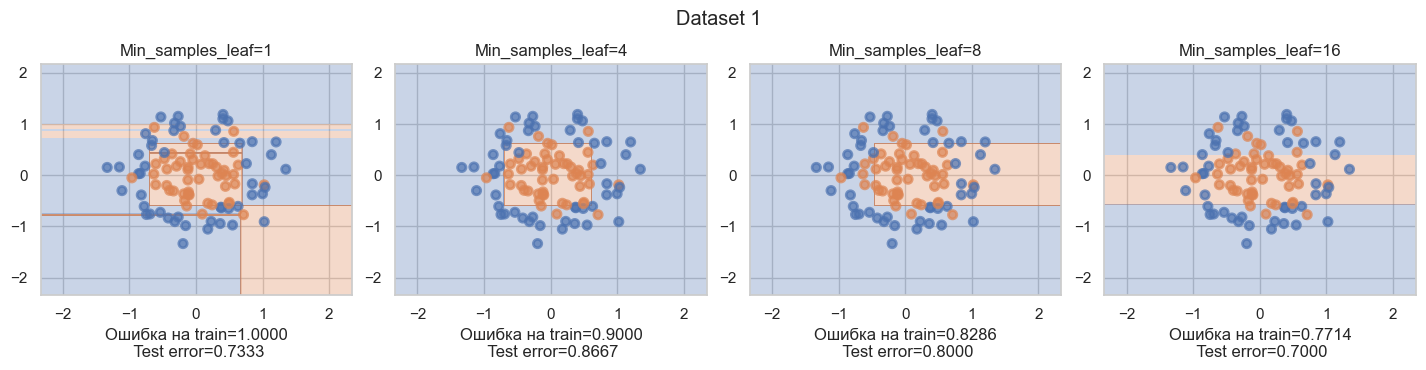

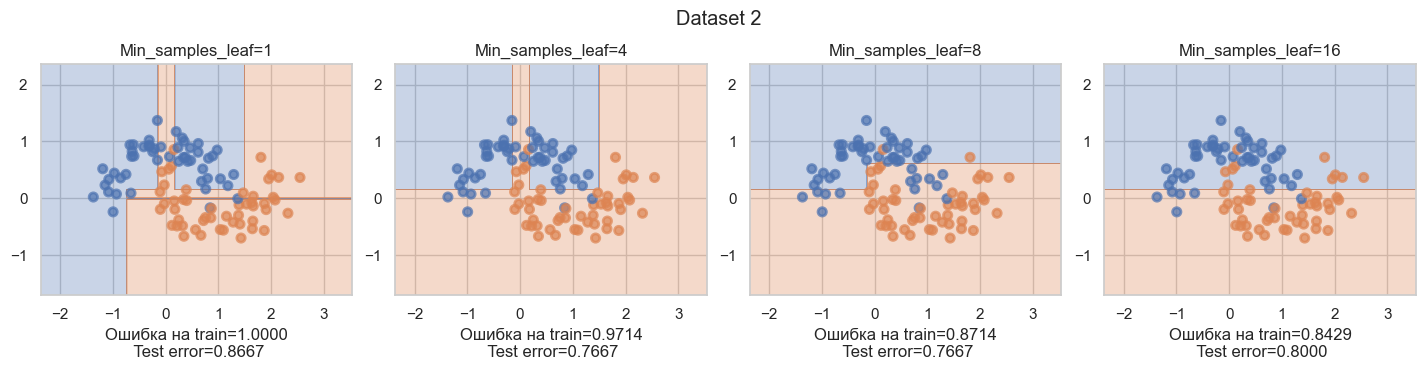

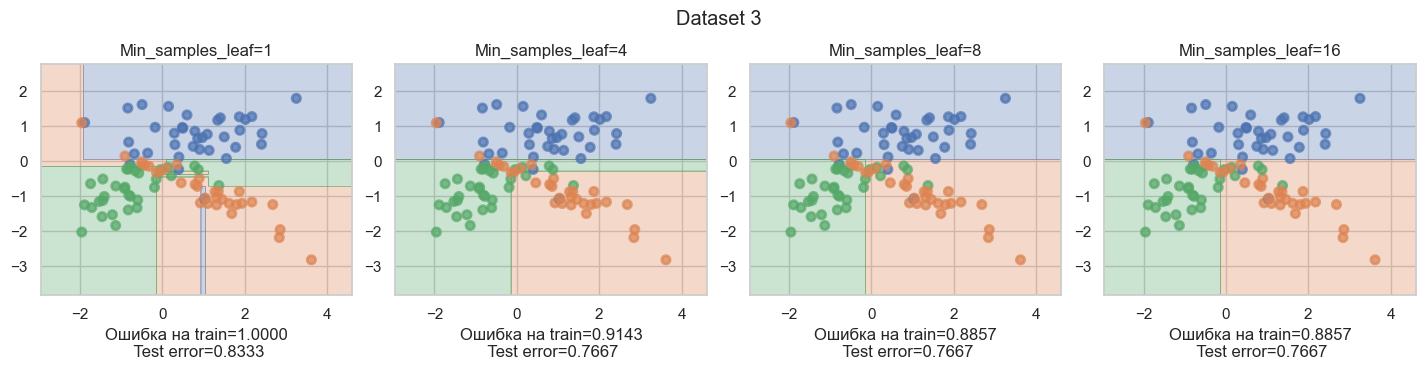

In [13]:
min_samples_leaf =  [1, 4, 8, 16]

for j in range(len(datasets)):
    X, y = datasets[j]
    plt.figure(figsize=(15, 4))
    i = 0

    for el in min_samples_leaf:
        clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=el)
        acc_train, acc_test = train_decis_tree(X, y, clf, plot_surf=False)

        plt.subplot(1, 4, i + 1)
        plot_surface(clf, X, y)
        plt.title('Min_samples_leaf=%d'%el)
        plt.xlabel('Train Error={:.4f}\n Test error={:.4f}'.format(acc_train, acc_test))
        i+=1

    plt.suptitle('Dataset %d'%(j+1))
    plt.show()

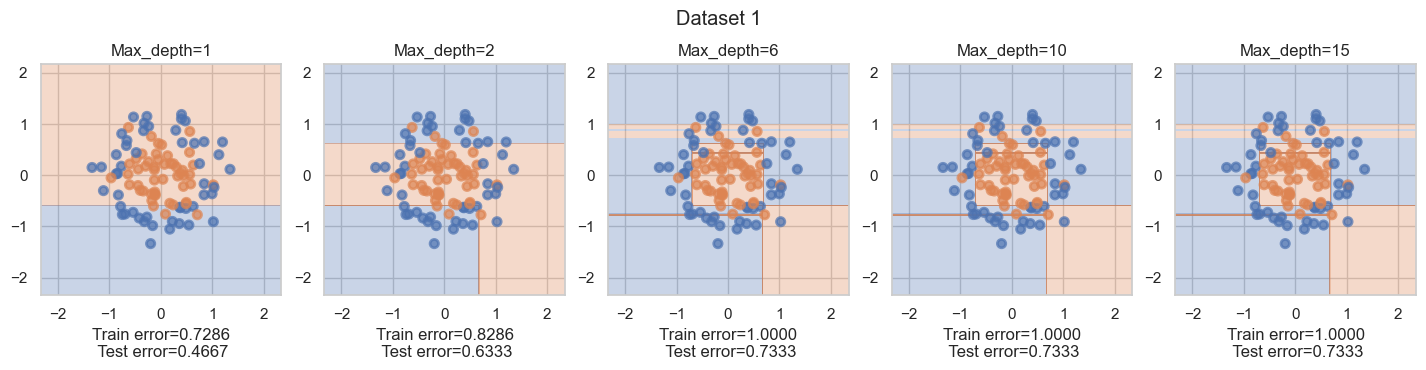

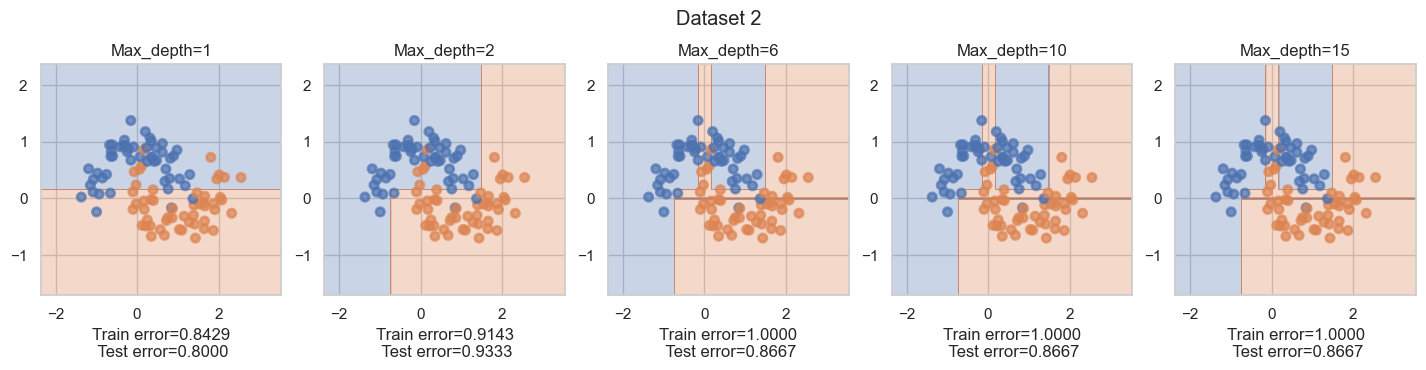

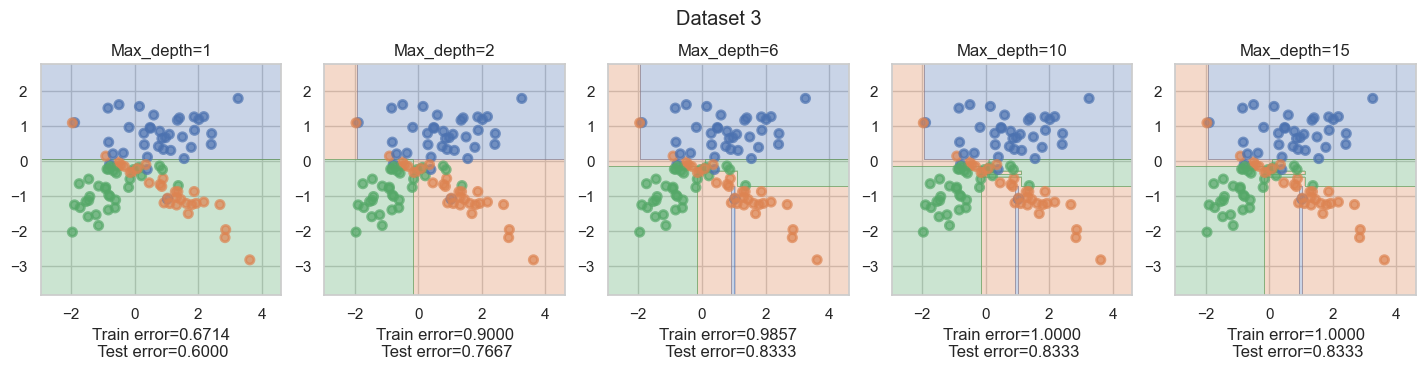

In [14]:
max_depth =  [1, 2, 6, 10, 15]

for j in range(len(datasets)):
    X, y = datasets[j]
    plt.figure(figsize=(15, 4))
    i = 0

    for depth in max_depth:
        clf = DecisionTreeClassifier(random_state=42, max_depth=depth)
        acc_train, acc_test = train_decis_tree(X, y, clf, plot_surf=False)

        plt.subplot(1, 5, i + 1)
        plot_surface(clf, X, y)
        plt.title('Max_depth=%d'%depth)
        plt.xlabel('Train error={:.4f}\n Test error={:.4f}'.format(acc_train, acc_test))
        i+=1

    plt.suptitle('Dataset %d'%(j+1))
    plt.show()

#### Conclusion:
+ Not suprising, _max_depth_ and _min_sample_leaf_ limitations decrease overfitting.

# 2. Decision trees with your own hands

> In this part, I implement my class for learning the decision tree in the binary classification problem with the ability to process the real number and categorical features.

Consider the table [students.csv](https://github.com/sokolov/ml-course-the/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv). In it, the attributes of the object are written in the first five columns, and the target variable (class: 0 or 1) is written in the last one. Let's build five "threshold — value of the Gini criterion" curves on one image for all five features. We visualize scatter graphs "attribute value — class" for all five attributes.

**Attention**: The Gini criterion here means the following function:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$

In [15]:
import dec_tree
from dec_tree import find_best_split

In [16]:
df = pd.read_csv("students.csv")

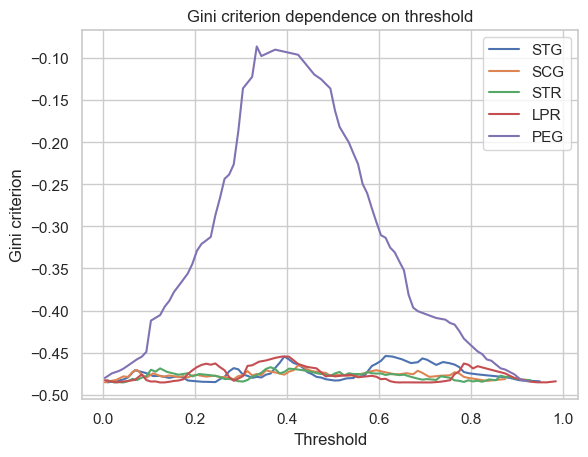

In [17]:
columns = df.columns.to_list()
columns.pop()

for column in columns:
    tresholds, ginis, threshold_best, gini_best = find_best_split(df[column].to_numpy(), df['UNS'].to_numpy())
    plt.plot(tresholds, ginis, label=column)
    plt.legend()
    
plt.title('Gini criterion dependence on threshold')
plt.xlabel('Threshold')
plt.ylabel('Gini criterion')
plt.show()

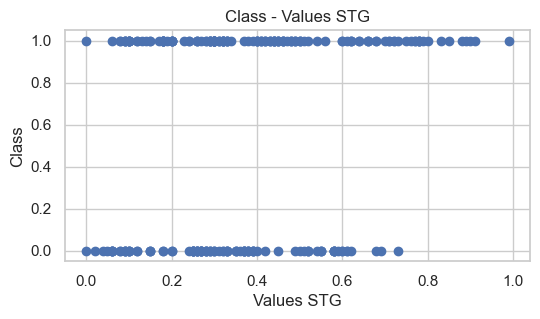

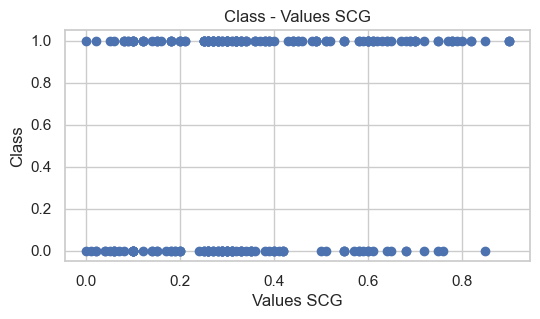

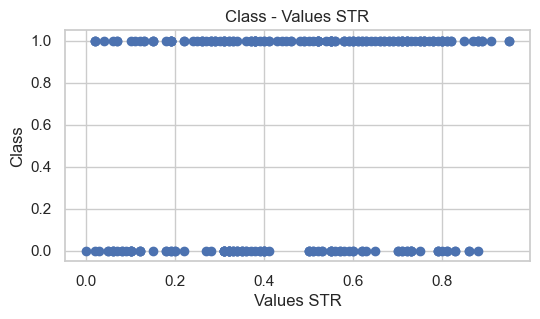

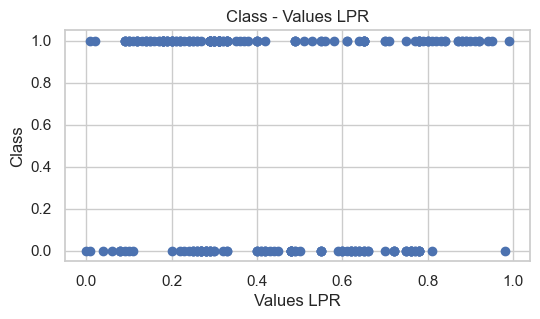

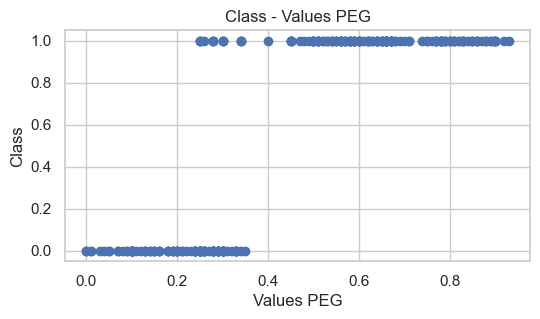

In [18]:
for column in columns:
    fig = plt.figure(figsize=(6,3))
    plt.scatter(df[column], df['UNS'])
    
    plt.title(f'Class - Values {column}')
    plt.xlabel(f'Values {column}')
    plt.ylabel('Class')
    plt.show()

### Conclusion
+ Feature named "PEG" has a peak on a Gini chart, it tell us there is good threshold on this feature that split our data in two sets were target variable differs.
+ This is what we see on the last chart with the dependency of the attribute values and target class

### There are three things a man should do in his life: build a house, and raise a son and implement the tree.

The tree is constructed according to the basic greedy algorithm. The best partition must be selected according to the Gini criterion. Stop criterion: All objects in the sheet belong to the same class or cannot be broken down into a sample. The answer in the sheet is: the most common class in the sheet. The transformation is performed for categorical features.

#### Testing my Tree

Let's test the decision tree on the dataset [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom ). You need to download the agaricus-lepiota.data table (from [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom )). The first column is the target variable (e — edible, p — poisonous)

In [80]:
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 
           'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
          'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
          'ring-type', 'spore-print-color', 'population', 'habitat']
df_mushrooms = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',
                names=columns)

In [7]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from dec_tree import DecisionTree
from sklearn.metrics import accuracy_score

In [82]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
encoder = LabelEncoder()

for column in df_mushrooms.columns:
    df_mushrooms[column] = encoder.fit_transform(df_mushrooms[column])

y = df_mushrooms['class']
X = df_mushrooms.drop(columns=['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

feature_types = ['categorical'] * X_train.shape[1]
clf = DecisionTree(feature_types)
clf.fit(X_train.to_numpy(), y_train.to_numpy())

In [84]:
y_pred = clf.predict(X_test.to_numpy())
score = accuracy_score(y_test, y_pred)
print(score)

1.0


+ Nothing was broken. But you see only what you are allowed to see.

#### Max_depth, min_samples_split and min_samples_leaf

The Decision Tree class has support the max_depth, min_samples_split and min_samples_leaf parameters, similar to the DecisionTreeClassifier. Let's look at the dependences of the prediction quality depending on these parameters.

In [85]:
encoder = LabelEncoder()

for column in df_mushrooms.columns:
    df_mushrooms[column] = encoder.fit_transform(df_mushrooms[column])

y = df_mushrooms['class']
X = df_mushrooms.drop(columns=['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

feature_types = ['categorical'] * X_train.shape[1]

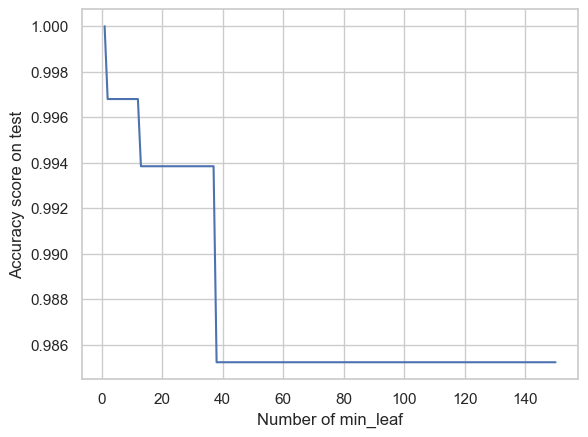

In [86]:
leaf = np.arange(150) + 1
accur = []

for el in leaf:
    clf = DecisionTree(feature_types, min_samples_leaf=el)
    clf.fit(X_train.to_numpy(), y_train.to_numpy())
    y_pred = clf.predict(X_test.to_numpy())
    accur.append(accuracy_score(y_test, y_pred))

plt.xlabel("Number of min_leaf")
plt.ylabel("Accuracy score on test")
plt.plot(leaf,accur)

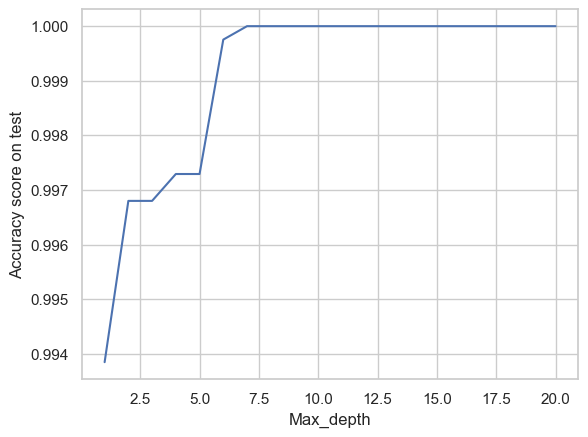

In [90]:
max_depth = np.arange(20) + 1
accur = []

for depth in max_depth:
    clf = DecisionTree(feature_types, max_depth=depth)
    clf.fit(X_train.to_numpy(), y_train.to_numpy())
    y_pred = clf.predict(X_test.to_numpy())
    accur.append(accuracy_score(y_test, y_pred))

plt.xlabel("Max_depth")
plt.ylabel("Accuracy score on test")
plt.plot(max_depth, accur)

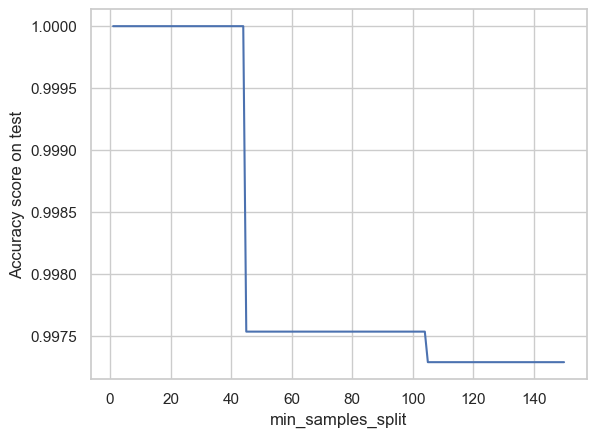

In [92]:
min_split = np.arange(150) + 1
accur = []

for split in min_split:
    clf = DecisionTree(feature_types, min_samples_split=split)
    clf.fit(X_train.to_numpy(), y_train.to_numpy())
    y_pred = clf.predict(X_test.to_numpy())
    accur.append(accuracy_score(y_test, y_pred))

plt.xlabel("min_samples_split")
plt.ylabel("Accuracy score on test")
plt.plot(min_split, accur)

+ We don't have overfitting, so accuracy score on test is decreasing with our limitations paraments
+ The main thing that it's working

### Part 2
Let's load the following data sets:
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom ) (uploaded in the previous paragraph, classes are written in the zero column),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame ) (classes are written in the last column)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation ) (classes are written in the last column, we assume that unacc, acc is class 0, good, vgood is class 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery ) (the classes are written in the last column, we assume that not_recom and recommend are class 0, very_recom, priority, spec_prior are class 1).

We encode categorical features using LabelEncoder. Using cross_val_score (cv=10), we will evaluate accuracy on each of these data sets of the following algorithms:
* DecisionTree, which considers all signs to be real
* DecisionTree, which considers all signs categorical
* DecisionTree, which considers all signs to be real + one-hot-encoding of all signs
* DecisionTreeClassifier from sklearn. Write the result in pd.DataFrame (data sets by rows, algorithms by columns).


In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer

In [5]:
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 
           'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
          'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
          'ring-type', 'spore-print-color', 'population', 'habitat']
df_mushrooms = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',
                names=columns)

columns = ['top-left-square', 'top-middle-square', 'top-right-square', 'middle-left-square', 'middle-middle-square',
          'middle-right-square', 'bottom-left-square', 'bottom-middle-square', 'bottom-right-square', 'class']
df_tic_tac_toe = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data',
                            names=columns)    

columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df_cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=columns)
df_cars.loc[df_cars['class'].isin(['unacc', 'acc']), 'class'] = 0
df_cars.loc[df_cars['class'].isin(['good', 'vgood']), 'class'] = 1

columns = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class']
df_nursery = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data', names=columns)
df_nursery.loc[df_nursery['class'].isin(['not_recom', 'recommend']), 'class'] = 0
df_nursery.loc[df_nursery['class'].isin(['very_recom', 'priority', 'spec_prior']), 'class'] = 1
    

In [8]:
dataframes = {'mushrooms': df_mushrooms, 
              'tic_tac_toe': df_tic_tac_toe, 
              'cars': df_cars, 
              'nursery': df_nursery
             }
y_data = {}
X_data = {}
encoder = LabelEncoder()

for name, df in dataframes.items():
    for column in df.columns:
        df[column] = encoder.fit_transform(df[column])
    y_data[name] = df['class']
    X_data[name] = df.drop(columns=['class'])

In [10]:
score = []

for name, df in dataframes.items():
    feature_types = ['real'] * X_data[name].shape[1]
    clf = DecisionTree(feature_types)
    y_pred = clf.predict(X_data[name].values)
    score = accuracy_score(y_data[name].values, y_pred)
    # scores = cross_val_score(clf, X_data[name].values, y_data[name].values, cv=10, scoring=make_scorer(accuracy_score))
    score.append(score)
total = pd.DataFrame(score, index=list(dataframes), columns=['real_features'])    

KeyError: 'feature_split'